In [44]:
# Import necessary modules
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('https://assets.datacamp.com/production/repositories/628/datasets/021d4b9e98d0f9941e7bfc932a5787b362fafe3b/boston.csv')

In [3]:
df.head()

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
# Alternatively we can load the dataset from the sklearn.dataset
boston = datasets.load_boston()

In [5]:
# Print the keys and DESCR of the dataset
print(boston.keys())
print(boston.DESCR)

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX

In [6]:
# Print the shape of the images and data keys
print(f" boston.data shape: {boston.data.shape}")
print(f" boston.target.shape: {boston.target.shape}")

 boston.data shape: (506, 13)
 boston.target.shape: (506,)


In [7]:
df.head()

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NX       506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [9]:
# Using the dataframe 'df' we split into feature and target arrays using the 'values' method which gives us numpy arrays
X = df.drop('MEDV', axis=1).values
y = df.MEDV.values

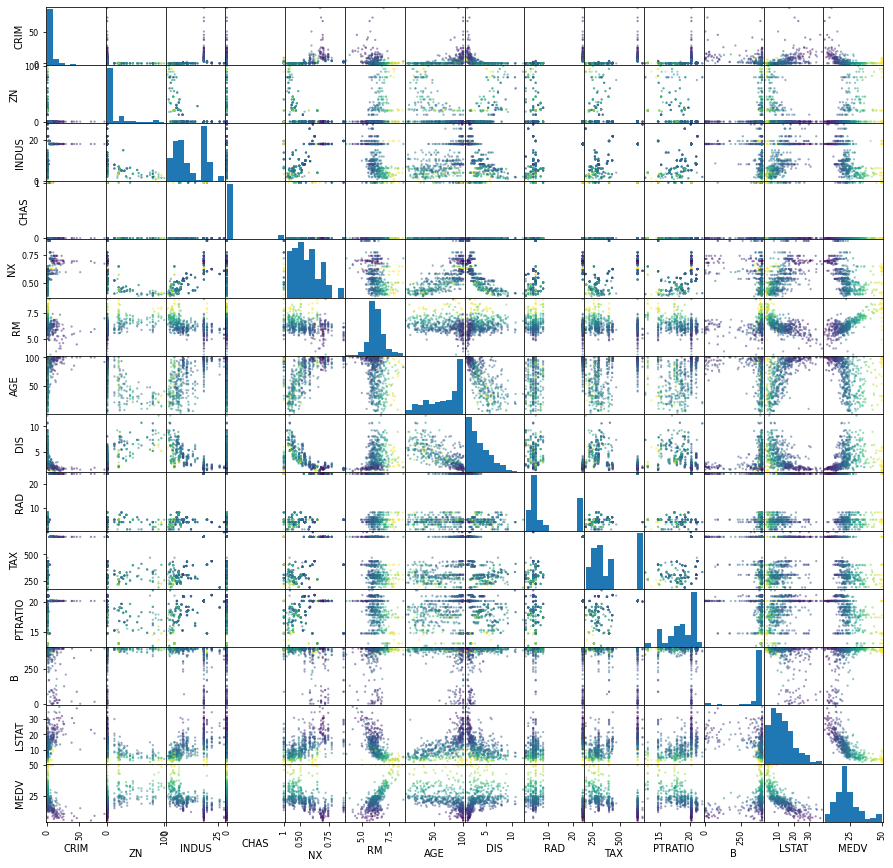

In [10]:
# Use pandas built in .plotting library with .scatter_matrix passing df c=y for color represented by the target data,
# figsize for the height and width, marker 'D' for diamond shape and s for size of marker
_ = pd.plotting.scatter_matrix(df, c=y, figsize=[15,15],
                          s=20, marker='.')

<AxesSubplot:>

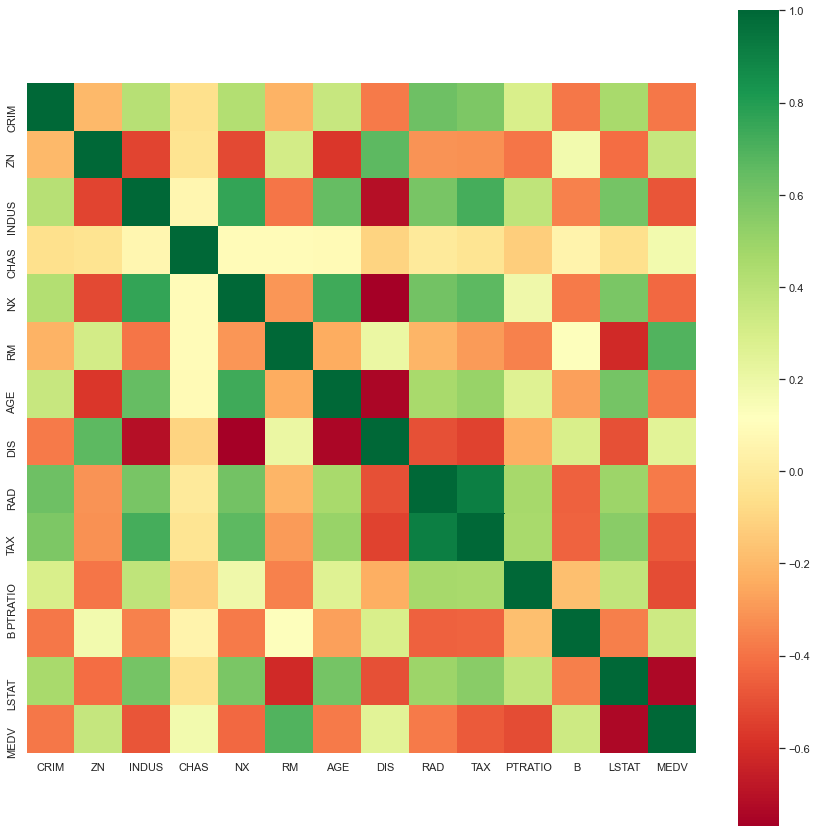

In [34]:
# Look at a correlation plot
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(df.corr(), square=True, cmap='RdYlGn')

# Predict house value (median value in $1000's) from a single feature

In [11]:
# From the above charts we see that there seems to be a strong correlation between 
# MEDV(target Median value in $1000s) and RM (# of rooms) (Positive corr) or LSTAT (% lower status of the population) (Neg corr)
# We will choose RM
X_rooms = X[:,5]
type(X_rooms), type(y)

(numpy.ndarray, numpy.ndarray)

In [12]:
X_rooms[:5]

array([6.575, 6.421, 7.185, 6.998, 7.147])

In [13]:
X_rooms.shape

(506,)

We need the array to be in all rows and 1 column so we can use the .reshape method calling a -1 for the number of rows even though we know it should be 506 rows in this specific example (-1 indicates an unknown dimension which NumPy will calculate for us)

In [14]:
X_rooms = X_rooms.reshape(-1,1)

In [15]:
X_rooms.shape

(506, 1)

In [16]:
X_rooms[:5]

array([[6.575],
       [6.421],
       [7.185],
       [6.998],
       [7.147]])

In [17]:
# same for our target column
y = y.reshape(-1,1)

In [18]:
y.shape

(506, 1)

## Plot house value vs. number of rooms

Text(0, 0.5, "Value of house in $1000's")

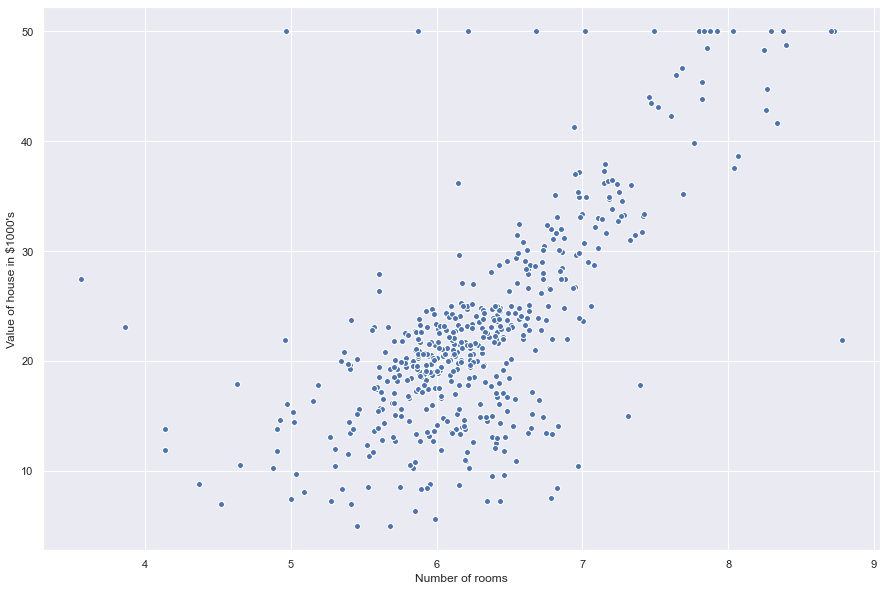

In [19]:
sns.set_theme()
fig, ax = plt.subplots(figsize=(15,10))
plt.scatter(X_rooms, y,  edgecolors='white')
plt.xlabel('Number of rooms')
plt.ylabel("Value of house in $1000's")

<AxesSubplot:xlabel='RM', ylabel='MEDV'>

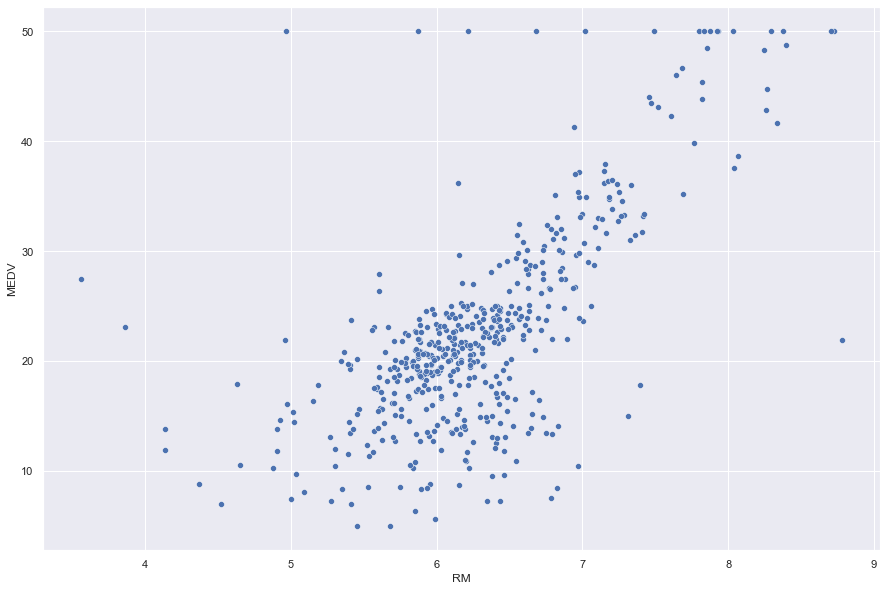

In [20]:
# Alternatively we can use Seaborn with less code
fig, ax = plt.subplots(figsize=(15,10))
sns.scatterplot(x='RM', y='MEDV', data=df, edgecolor='white')

# Fit a regression model to our data

In [21]:
# Since we already imported LinearRegression from sklearn.linear_model we can use it in our namespace
reg = LinearRegression()

In [22]:
# Fit the data 
reg.fit(X_rooms, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
# Check our the regressor's prediction across the extremes of our data by creating an array of the min/max of X_rooms
prediction_space = np.linspace(min(X_rooms), max(X_rooms)).reshape(-1,1)

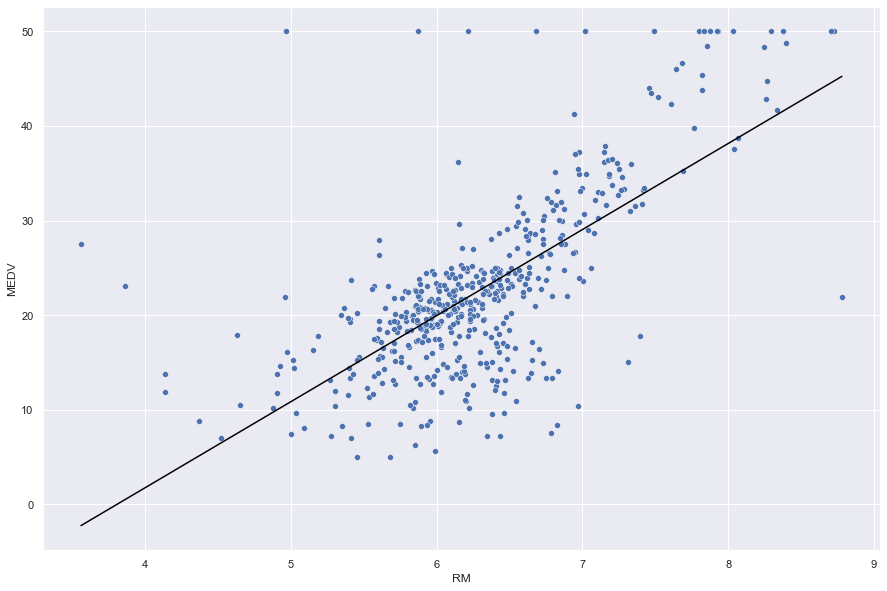

In [31]:
# Plot the results over our scatterplot data
fig, ax = plt.subplots(figsize=(15,10))
sns.scatterplot(x='RM', y='MEDV', data=df, edgecolor='white')
plt.plot(prediction_space, reg.predict(prediction_space),
        color='black')

# Linear regression on all features

In [36]:
# We've already imported train_test_split and LinearRegression from sklearn 
# Now we split our data using train_test_split and instantiate the LinearRegression function
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.3, random_state=42)
reg_all = LinearRegression()

In [37]:
# Fit and predict our data
reg_all.fit(X_train, y_train)
y_pred = reg_all.predict(X_test)

R-squared is the counterpart to Accuracy in the Classification world to quantify the "goodness of fit"
Intuitively the R-squared quantifies the amount of variance in the target variable that is predicted from the feature variables

In [38]:
# Use the .score() method and pass it the test data from the train_test_split 
reg_all.score(X_test, y_test)

0.7112260057484953

# Cross-validation in scikit-learn

Using the cross_val_score imported from sklearn.model_selection we can perform 5-fold cross validation
which will split our data into 5 distinct sets and then we run the regression with the test data holdout of each set for a total of 5 times
![cross_val_example](./images/cross_validation_example.png)

In [40]:
# Instantiate the LinearRegression model and run cross_val_score

reg = LinearRegression()
cv_results = cross_val_score(reg, X_test, y_test, cv=5)
print(f"cv_results from 5-fold cross validation: {cv_results}")

cv_results from 5-fold cross validation: [ 0.76071423  0.76089644  0.78811065 -0.02383891  0.6629651 ]


In [41]:
# We can then calculate the mean of the cv_results
print(f"Mean of cv_results with cv=5: {np.mean(cv_results)}")
print(f"Std dev of cv_results with cv=5: {np.std(cv_results)}")

Mean of cv_results with cv=5: 0.5897695007573229
Std dev of cv_results with cv=5: 0.3097478401515471


# k-Fold comparision of linear regression

Cross validation is essential but computationally expensive. 
We will examine the "cost" in time by using the %timeit function and by comparing 3-fold vs. 10-fold cross validation

In [42]:
# Create a linear regression object: reg
reg = LinearRegression()

# Perform 3-fold CV
_ = %timeit cross_val_score(reg, X_test, y_test, cv=3)
cvscores_3 = cross_val_score(reg, X_test, y_test, cv=3)
print(f"Using cv=3 the mean R^2 value is: {np.mean(cvscores_3)}")

3.05 ms ± 162 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Using cv=3 the mean R^2 value is: 0.5746865773289274


In [43]:
# Perform 10-fold CV
_ = %timeit cross_val_score(reg, X_test, y_test, cv=10)
cvscores_10 = cross_val_score(reg, X_test, y_test, cv=10)
print(f"Using cv=10 the mean R^2 value is: {np.mean(cvscores_10)}")
#print(np.mean(cvscores_10))

10.2 ms ± 249 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Using cv=10 the mean R^2 value is: 0.5991585422244141
0.5991585422244141


# Lasso for feature selection in scikit-learn

In [45]:
# Perform Lasso regression and examine the coefficients of each feature on a graph to visualize

# First store columns names less the target column
names = df.drop('MEDV', axis=1).columns

In [47]:
# Instantiate the lasso regressor
lasso = Lasso(alpha=0.1)

In [49]:
# Fit the data
lasso_coef = lasso.fit(X, y).coef_

Text(0, 0.5, 'Coefficients')

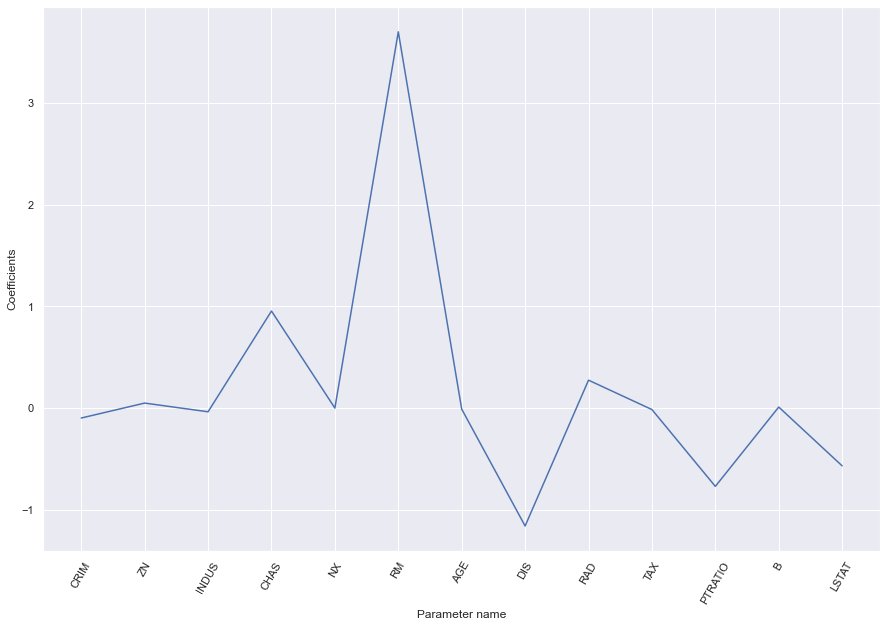

In [53]:
# Plot the coefficients for each name
fig, ax = plt.subplots(figsize=(15,10))
plt.plot(range(len(names)), lasso_coef)
plt.xticks(range(len(names)), names, rotation=60)
plt.xlabel('Parameter name')
plt.ylabel('Coefficients')

Text(0, 0.5, 'Coefficients')

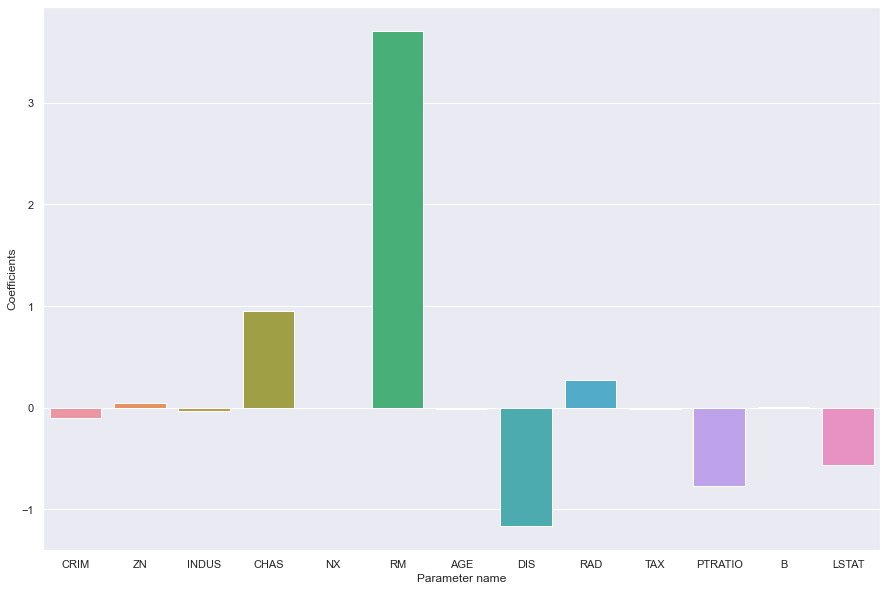

In [74]:
# Plot the coefficients for each name using seaborn
fig, ax = plt.subplots(figsize=(15,10))
sns.barplot(x= names, y=lasso_coef)
plt.xlabel('Parameter name')
plt.ylabel('Coefficients')

This graph shows that the most important predictor of Median Housing price is RM or # of rooms